In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
path ='/content/gdrive/MyDrive/SMT_3/ML/Praktikum/Praktikum03/Data/socr.csv'

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/gdrive/MyDrive/SMT_3/ML/Praktikum/Praktikum03/Data/socr.csv')
df.head(10
)

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971
5,6,68.69784,123.3024
6,7,69.80204,141.4947
7,8,70.01472,136.4623
8,9,67.90265,112.3723
9,10,66.78236,120.6672


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           25000 non-null  int64  
 1   Height(Inches)  25000 non-null  float64
 2   Weight(Pounds)  25000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 586.1 KB


In [ ]:
df.describe()

,Index,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421
std,7217.022701,1.901679,11.660898
min,1.000000,60.278360,78.014760
25%,6250.750000,66.704397,119.308675
50%,12500.500000,67.995700,127.157750
75%,18750.250000,69.272958,134.892850
max,25000.000000,75.152800,170.924000


In [ ]:
df1 = (
    df[["Height(Inches)", "Weight(Pounds)"]]
    .rename(columns={"Height(Inches)": "Tinggi_cm",
            "Weight(Pounds)": "Berat_kg"})
    .assign(
        Tinggi_cm=lambda d: d["Tinggi_cm"] * 2.54,
        Berat_kg=lambda d: d["Berat_kg"] * 0.45359237
    )
    .round({"Tinggi_cm":2, "Berat_kg":2})
).copy()

df1.head()

,Tinggi_cm,Berat_kg
0,167.09,51.25
1,181.65,61.91
2,176.27,69.41
3,173.27,64.56
4,172.18,65.45


In [ ]:
from sklearn.model_selection import train_test_split

X = df1[["Tinggi_cm"]]
y = df1[["Berat_kg"]]
X_train, X_test, Y_train, Y_test = train_test_split(
    X, y, test_size=0.2, random_state=7
    )



In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

Y_pred = model.predict(X_test)
r2 = r2_score(Y_test, Y_pred)

print("Koefisien (kg per cm):", model.coef_[0])
print("Intersep (kg):", model.intercept_)
print("R2 (test):", r2)
print("MAE (kg):", mean_absolute_error(Y_test, Y_pred))
mse = mean_squared_error(Y_test, Y_pred) # default squared=True
rmse = np.sqrt(mse)
print("RMSE (kg):", rmse)

Koefisien (kg per cm): [0.55182326]
Intersep (kg): [-37.65708878]
R2 (test): 0.24989263013277574
MAE (kg): 3.6704107898943548
RMSE (kg): 4.609006140308042


In [ ]:
slope = model.coef_[0][0]
intercept = model.intercept_
print(f"persamaan : y = {model.coef_[0][0]:.3f} * x + {model.intercept_[0]:.3f}")


persamaan : y = 0.552 * x + -37.657


TypeError: unsupported format string passed to numpy.ndarray.__format__

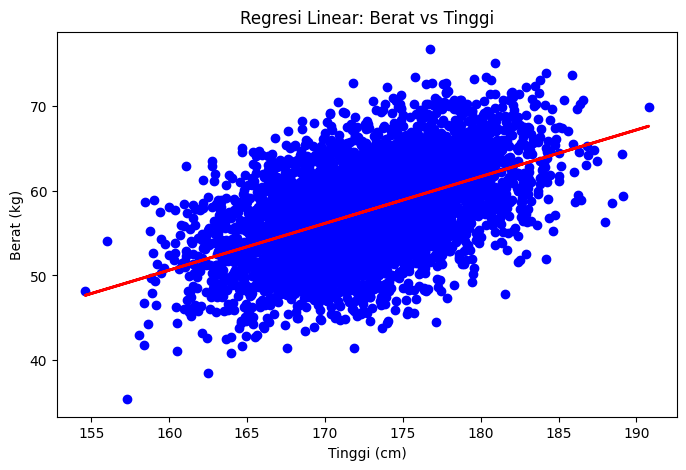

In [ ]:
import matplotlib.pyplot as plt

#Plot data scatter
plt.figure(figsize=(8, 5))
plt.scatter(X_test, Y_test, color="blue", label="Data Aktual")
#Garis regresi
plt.plot(X_test, Y_pred, color="red", linewidth=2, label="Prediksi")
plt.xlabel("Tinggi (cm)")
plt.ylabel("Berat (kg)")
plt.title("Regresi Linear: Berat vs Tinggi")
plt.text(
0.02, 0.98,
f"y = {slope:.3f} * x + {intercept:.3f}\n$R^2$ = {r2:.3f}",
transform=plt.gca().transAxes, va="top"
)
plt.legend()
plt.tight_layout()
plt.show()